In [30]:
!pip install -q yfinance pandas matplotlib numpy

[*********************100%***********************]  1 of 1 completed



 EURUSD is Volatile 
 Hotness Score: 1.4 
 The higher/further the score gets from 1 the more market is volatile.

 EURUSD is Trending 
 Trend Score: 5.4 
 The higher/further the score gets from 1 the more market is trending.


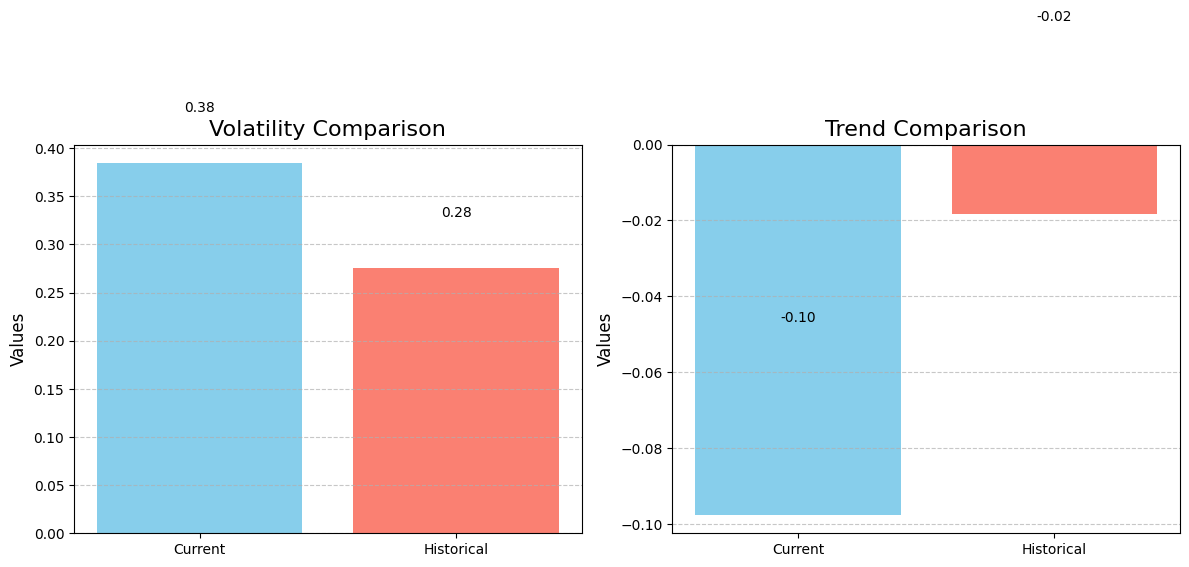

In [28]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

class TrendAnalyserTool:
    def __init__(self, ticker, interval, period, length, print_on_terminal=True, plot_chart=True):
        df = self.get_data(ticker, interval, period)
        pct_df = self.convert_price_to_percentage(df['Close'])
        sequences = self.split_into_sequences(pct_df, length)
        volatility_historical_average,trend_historical_average  = self.calculate_average(sequences, length, trend_or_volatility='volatility'), self.calculate_average(sequences, length, trend_or_volatility='trend')
        current_sequence = pct_df[-length:]
        volatility_average_of_curr_seq, trend_average_of_curr_seq = np.mean(np.abs(current_sequence.values)), np.mean(current_sequence.values)
        volatility_score, trend_score = volatility_average_of_curr_seq / volatility_historical_average,  trend_average_of_curr_seq / trend_historical_average
        if print_on_terminal:
            self.print_results(ticker, volatility_score, trend_score)
        if plot_chart:
            self.plot_trend_and_volatility(volatility_average_of_curr_seq, volatility_historical_average, trend_average_of_curr_seq, trend_historical_average)

    def get_data(self, ticker, interval, period):
        forex_pairs = ["EURUSD", "USDJPY", "GBPUSD", "USDCHF", "AUDUSD", "USDCAD", "NZDUSD","EURGBP","CHFUSD", "EURJPY", "GBPJPY", "AUDJPY", "NZDJPY", "AUDNZD", "EURAUD","GBPAUD","EURCHF", "EURCAD", "GBPCAD", "EURNZD", "GBPNZD", "CHFJPY", "CADJPY","AUDCAD", "NZDCAD", "AUDCHF", "NZDCHF", "CADCHF","USDSEK", "USDNOK", "USDDKK", "USDZAR", "USDTRY", "USDMXN", "USDSGD","USDHKD", "USDKRW", "USDTHB", "USDCNH", "USDPLN", "USDHUF", "USDCZK","EURSEK", "EURNOK", "EURDKK", "EURTRY", "EURZAR", "EURSGD", "EURHUF","EURPLN", "EURCZK", "GBPSEK", "GBPNOK", "GBPDKK", "GBPTRY", "GBPZAR","AUDSGD", "AUDHKD", "AUDPLN", "CADSGD", "NZDSGD", "SGDJPY", "NOKJPY","SEKJPY", "ZARJPY", "TRYJPY", "MXNJPY"]
        if ticker.upper() in forex_pairs:
            ticker = f'{ticker.upper()}=X'
        data = yf.download(ticker, interval=interval, period=period)
        return data

    def convert_price_to_percentage(self,df):  #optimized
        converted_df = df.pct_change() * 100
        converted_df = converted_df.fillna(0)
        return converted_df

    def split_into_sequences(self, df, num_element_per_sequence):
        df = df[:-num_element_per_sequence]  # Optional: excludes last elements if needed
        return np.lib.stride_tricks.sliding_window_view(df.values, (num_element_per_sequence, df.shape[1]))

    def calculate_average(self, sequences, length, trend_or_volatility='trend'):
        avg_list = []
        for sequence in sequences:
            if trend_or_volatility.lower() =='volatility':
                sequence = np.abs(sequence)
            avg = np.mean(sequence)
            avg_list.append(avg)
        np_avg_list = np.array(avg_list)
        return np.mean(np_avg_list)

    def print_results(self, ticker, volatility_score, trend_score):
        if volatility_score <= 1:
            print(f"\n {ticker.upper()} isn't Volatile \n Hotness Score: {volatility_score:.1f} \n The closer the score gets from 0 the more market is flat (and lower than 1 = flatter)")
        else:
            print(f"\n {ticker.upper()} is Volatile \n Hotness Score: {volatility_score:.1f} \n The higher/further the score gets from 1 the more market is volatile.")
        if trend_score <= 1:
            print(f"\n {ticker.upper()} is Consolidating \n Trend Score: {trend_score:.1f} \n The closer the score gets from 0 the more market is consolidating (and lower than 1 = flatter consolidation)")
        else:
            print(f"\n {ticker.upper()} is Trending \n Trend Score: {trend_score:.1f} \n The higher/further the score gets from 1 the more market is trending.")

    def plot_trend_and_volatility(self, volatility_current, volatility_historical, trend_current, trend_historical):
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].bar(['Current', 'Historical'], [volatility_current, volatility_historical], color=['skyblue', 'salmon'])
        axs[0].set_title('Volatility Comparison', fontsize=16)
        axs[0].set_ylabel('Values', fontsize=12)
        axs[0].grid(axis='y', linestyle='--', alpha=0.7)

        for i, value in enumerate([volatility_current, volatility_historical]):
            axs[0].text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
        axs[1].bar(['Current', 'Historical'], [trend_current, trend_historical], color=['skyblue', 'salmon'])
        axs[1].set_title('Trend Comparison', fontsize=16)
        axs[1].set_ylabel('Values', fontsize=12)
        axs[1].grid(axis='y', linestyle='--', alpha=0.7)

        for i, value in enumerate([trend_current, trend_historical]):
            axs[1].text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()


tool = TrendAnalyserTool('EURUSD', '1d', '1y', 10)